# SCS 3253: Machine Learning
> Assignment 1: Classification

> May 2022

> Due Date: Tuesday June 7th, 6:30pm

### Your name & student number:

<pre> Name : Chu-Chuan Yang </pre>

<pre> Student Number : X258610 </pre>


# Instructions and Marking Guidelines
***
This assignment will account for 15% of your final grade. It is worth 22 marks in total, with 2 bonus marks available via an optional challenge at the end (note: your final assignment score will be capped at 100%). 

Please read the provided markdown (text) cells carefully. Some subsections contain multiple questions. Be sure to answer all questions. 

Answers should be provided within this same notebook and will be a mix of code, outputs (e.g. plots, trained models), and written reponses. 

#### TIPS

> 📝 **NOTE**: this first intro assignment is fairly structured; future assignments will be slightly more open-ended to allow for more 'organic' exploration of problems. 

> ⏳ **Please budget 4-5 hours to complete each assignment.** Reach out to us if you think your assignment will be more than 1 week late. 

> 📚 **You will likely need to refer to the documentation of libraries such as sklearn** while completing this assignment. Looking up things in 'the docs' is part of the day-to-day life of a Data Scientist. We encourage you to visit the docs if you haven't already. It's a great way to become more familiar and comfortable with the ML tools available to you.  
* You can find the scikit-learn docs [here](https://scikit-learn.org/stable/modules/classes.html)
* You can also find a variety of helpful guides and tutorials through the [main scikit-learn website](https://scikit-learn.org/stable/)
* Other helpful references can be found here:
 * [MatPlotLib](https://matplotlib.org/)
 * [Seaborn](seaborn.pydata.org)
 * [Pandas](https://pandas.pydata.org/docs/)
 * [Numpy](https://numpy.org/doc/)


> 💣  **When you enounter errors** (because it's a law of nature in coding), please carefully read what the error message is telling you. Debugging is a key skill to develop. It's about understanding the root cause of an error, trying a fix, and repeating with a new hypothesis as necessary. If you get totally stuck, try googling the error message. You can find many common errors and solutions documented on [stackoverflow](https://stackoverflow.com/). 



### Marking Guidelines

All questions will state the number of marks available, e.g. [X points].

In machine learning, there is not necessarily one "correct" answer to a given modelling problem. You **do not** need to have the "best" performing model in the class in order to receive full marks. Rather, we will be marking assignments individually, based on the following criteria:

* **Demonstration of core concepts [40%]**
 * Do your answers to written questions demonstrate you understand and can apply the core concepts taught in class? Are those answers justified by the calculations / plots / models you produced?

* **Reasonable outputs [30%]** 
 * Do the values you obtain make sense? Did you follow the expected steps. Do you show all steps and make your reasoning clear?

* **Effort [15%]** 
 * Are data visualizations or plots clear and easy to interpret? Did you make a reasonable effort to maximize the performance of the models you submitted?

* **Clean code [15%]** 
 * Is your python code easy to follow? Related code should be organized into re-usable functions and not be scattered across notebook cells. Function and variable names should be well-chosen to convey what they do or represent. Functions should have docstrings explaining what they do. Comments should be used to explain the details of what you are doing, to help your evaluator follow along. 

In [1]:
# === NOTEBOOK & IMPORT SETUP ===

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
%matplotlib inline

# Loading the Dataset
***

Your dataset for this assignment consists of ecological data collected from Penguins living in Antarctica. The data were made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Your goal will be to correctly identify Penguin species based on the following attributes:

- sex: penguin sex (Male or Female)
- island: name of the island (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) where the observation was made
- body_mass_g: body mass (g)
- flipper_length_mm: flipper length (mm)
- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)

*Note: the culmen is "the upper ridge of a bird's beak"*

The dataset is provided as the file `2022-a1-penguin-classification.csv` alongside this notebook. 

If using google colab, remember to upload the data csv file to the notebook's 'file' directory first (i.e. click on the folder tab on the left, then drag-and-drop the file next to `sample_data`)

In [2]:
df_penguin_data = pd.read_csv("./2022-a1-penguin-classification.csv")
df_penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Part 1: Binary Classification [22 points total]
***

This dataset contains multiple classes. There are 3 species of Penguins present. However, we will first focus on being able to identify Chinstrap penguins. Therefore our target variable will become `is_chinstrap`, which is equal to 1 if the Penguin is a Chinstrap, and 0 if it belongs to any other species.

The following code will transform the dataset to make it suitable for binary classification. 

> **Be sure to run the following transformation on the data before proceeding!**

In [3]:
# convert data to a binary classification problem
df_penguin_data["is_chinstrap"] = np.where((df_penguin_data["species"] == 'Chinstrap'),1, 0)
df_penguin_data = df_penguin_data.drop(columns=["species"], errors="ignore")

### A) Exploratory Data Analysis (EDA) [6 points]
Explore the data to answer the questions below. Include supporting tables or plots. You can use the techniques we demonstrated in class, or any other techniques you deem relevant.



i) How is the data distributed in your **target class**? Remark on how what you observe might impact model training or evaluation. [1 point]


In [4]:
df_penguin_data.shape

(344, 7)

In [5]:
df_penguin_data.keys()

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex', 'is_chinstrap'],
      dtype='object')

In [6]:
df_penguin_data.dtypes

island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
is_chinstrap           int64
dtype: object

In [7]:
df_penguin_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,is_chinstrap
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,0.197674
std,5.459584,1.974793,14.061714,801.954536,0.398825
min,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,39.225000,15.600000,190.000000,3550.000000,0.000000
50%,44.450000,17.300000,197.000000,4050.000000,0.000000
75%,48.500000,18.700000,213.000000,4750.000000,0.000000
max,59.600000,21.500000,231.000000,6300.000000,1.000000


In [8]:
# examine how many rows contain null value for each column
df_penguin_data.isnull().sum()

island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
is_chinstrap          0
dtype: int64

In [9]:
# examine how many chinstrap and non-chinstrap penguins contained in this dataset
df_penguin_data['is_chinstrap'].value_counts()

0    276
1     68
Name: is_chinstrap, dtype: int64

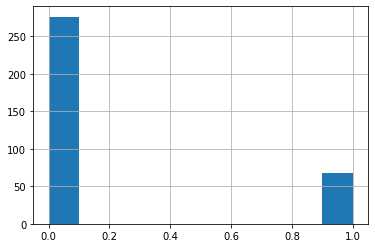

In [10]:
df_penguin_data['is_chinstrap'].hist(bins=10)

There are more non chinstrap penguins than chinsrap penguins, which means the target variable has imbalanced class distribution. This may also cause bias towards the prediction. 

ii) Examine the correlations between your **numerical** attributes and your target variable. Which feature seems most important? Based on the correlations, how would you describe a Chinstrap penguin relative to other penguins in terms of its features (e.g. do they tend to have longer or shorter culmen length, higher or lower body mass, etc)? [2 points]

In [11]:
#examine the correlations between numerical attributes and target variable
df_penguin_data.corr("spearman")

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,is_chinstrap
culmen_length_mm,1.000000,-0.221749,0.672772,0.583800,0.458200
culmen_depth_mm,-0.221749,1.000000,-0.523267,-0.432372,0.325192
flipper_length_mm,0.672772,-0.523267,1.000000,0.839974,-0.125432
body_mass_g,0.583800,-0.432372,0.839974,1.000000,-0.278166
is_chinstrap,0.458200,0.325192,-0.125432,-0.278166,1.000000


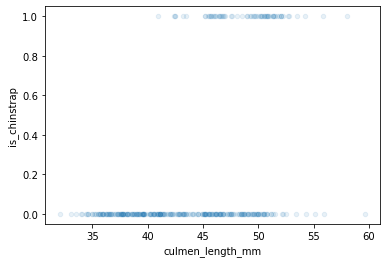

In [12]:
df_penguin_data.plot(kind="scatter", x="culmen_length_mm", y="is_chinstrap", alpha=0.1)

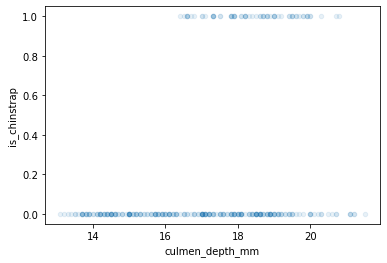

In [13]:
df_penguin_data.plot(kind="scatter", x="culmen_depth_mm", y="is_chinstrap", alpha=0.1)

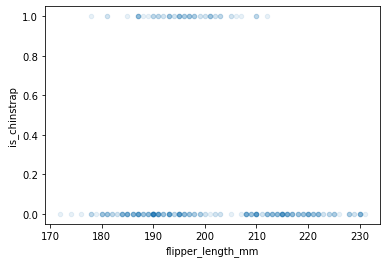

In [14]:
df_penguin_data.plot(kind="scatter", x="flipper_length_mm", y="is_chinstrap", alpha=0.1)

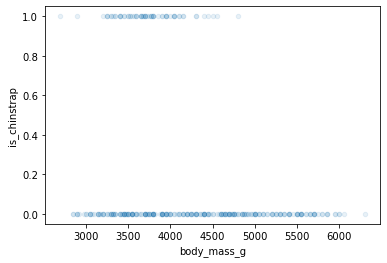

In [15]:
df_penguin_data.plot(kind="scatter", x="body_mass_g", y="is_chinstrap", alpha=0.1)

Based on the correlation, culmen length is more important feature to determine if the penguin is chinstrap. For the scatter plots, we can also tell that chinstrap penguin tend to have longer length and higher depth, but shorter flipper length and lower body mass. 

iii) Create plots for your features that reveal any differences in how they are distributed for the two values of your target variable (`is_chinstrap = 1` and `is_chinstrap = 0`). Remark on any obvservations that may be useful to this classification problem. Hint: consider histograms as well as multivariate scatterplots. [2 points]

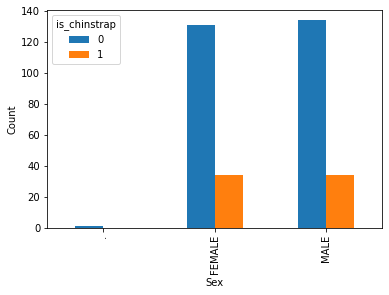

In [16]:
# compare the distribution of sex for the chinstrap and non-chinstrap penguins
pd.crosstab(df_penguin_data['sex'], df_penguin_data['is_chinstrap']).plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

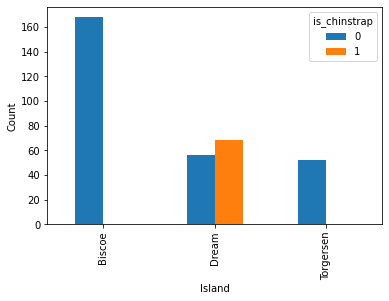

In [17]:
# compare the distribution of island for the chinstrap and non-chinstrap penguins
pd.crosstab(df_penguin_data['island'], df_penguin_data['is_chinstrap']).plot(kind='bar')
plt.xlabel('Island')
plt.ylabel('Count')
plt.show()

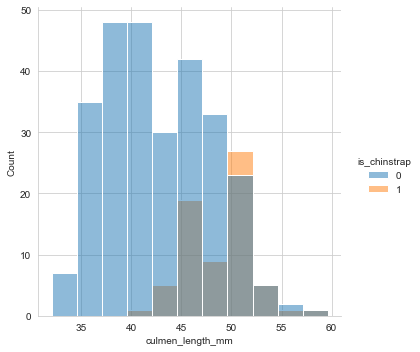

In [18]:
# compare the distribution of culmen length for the chinstrap and non-chinstrap penguins
sns.set_style("whitegrid");
sns.displot(df_penguin_data, x="culmen_length_mm", hue="is_chinstrap");
plt.show()

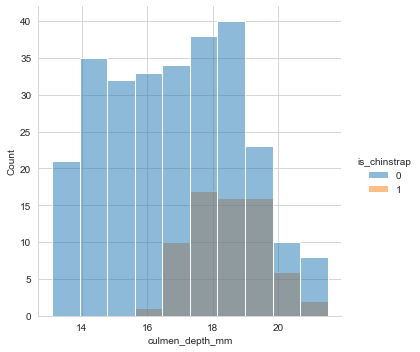

In [19]:
# compare the distribution of culmen depth for the chinstrap and non-chinstrap penguins
sns.set_style("whitegrid");
sns.displot(df_penguin_data, x="culmen_depth_mm", hue="is_chinstrap");
plt.show()

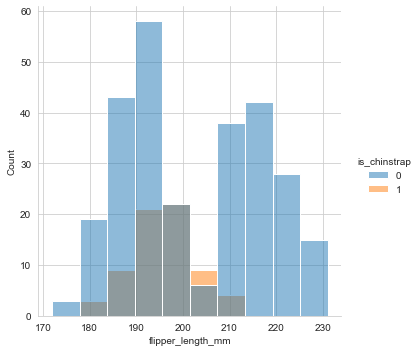

In [20]:
# compare the distribution of flipper length for the chinstrap and non-chinstrap penguins
sns.set_style("whitegrid");
sns.displot(df_penguin_data, x="flipper_length_mm", hue="is_chinstrap");
plt.show()

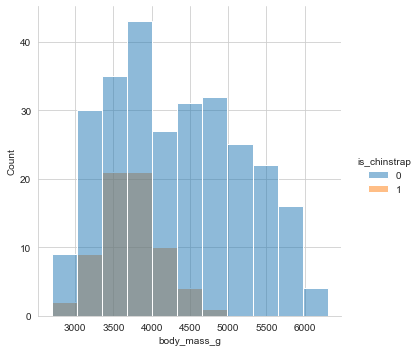

In [21]:
# compare the distribution of body mass for the chinstrap and non-chinstrap penguins
sns.set_style("whitegrid");
sns.displot(df_penguin_data, x="body_mass_g", hue="is_chinstrap");
plt.show()

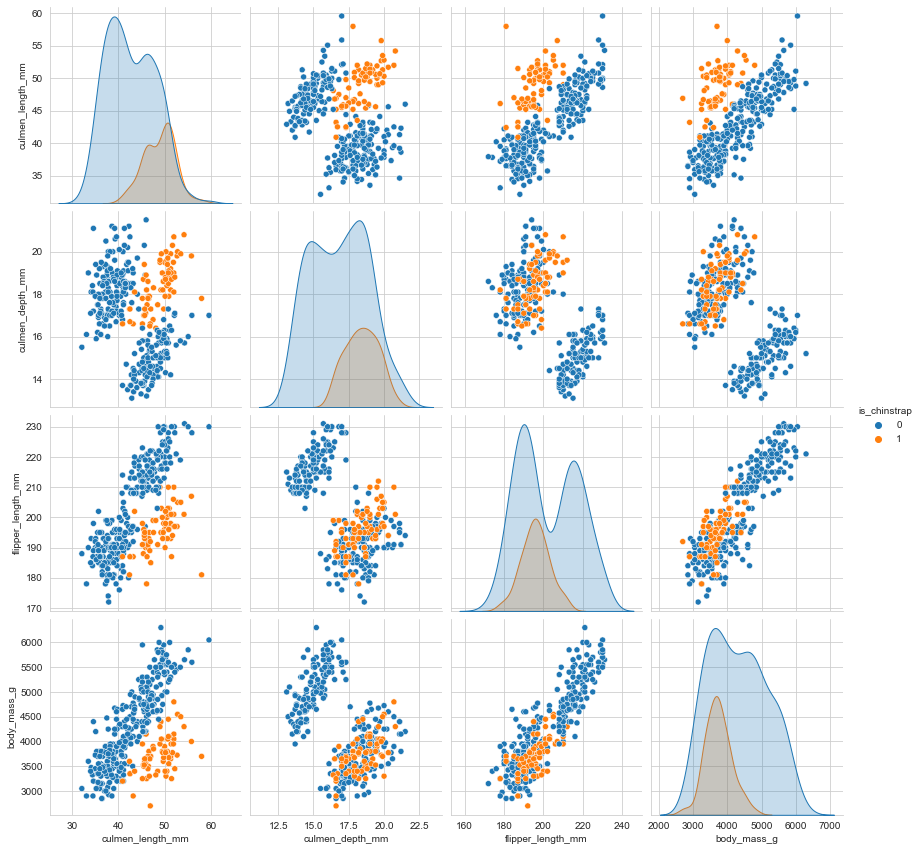

In [22]:
sns.set_style("whitegrid");
sns.pairplot(df_penguin_data, hue="is_chinstrap", height=3);
plt.show()

From the histograms and multivariate scatterplots above, we can tell that there are more distributed for the non-chinstrap penguins, which is same as we oberserved at part (i) for target variable. This may also affect the accuracy of our model as the variables are imbalanced.

iv) Does your data contain any outliers? Are there missing values? If so, identify them, and state how you might handle them. [1 point]

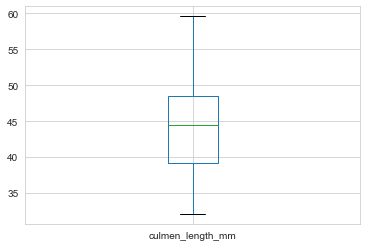

In [23]:
#examine if there is any outlier for culmen length feature
df_penguin_data['culmen_length_mm'].plot.box()

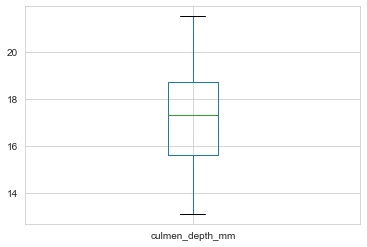

In [24]:
#examine if there is any outlier for culmen depth feature
df_penguin_data['culmen_depth_mm'].plot.box()

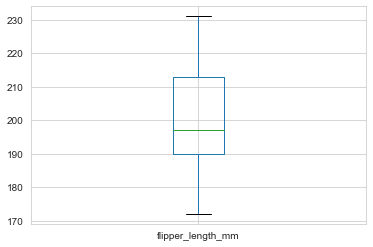

In [25]:
#examine if there is any outlier for flipper length feature
df_penguin_data['flipper_length_mm'].plot.box()

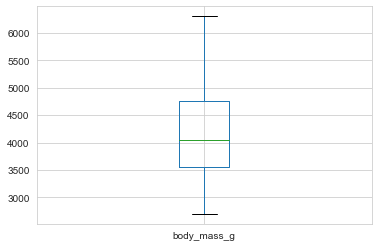

In [26]:
#examine if there is any outlier for body mass feature
df_penguin_data['body_mass_g'].plot.box()

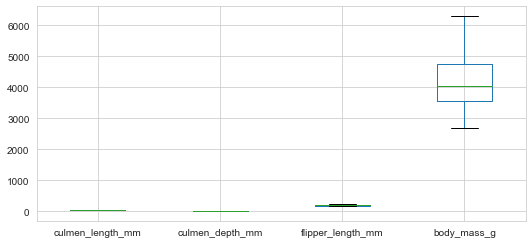

In [27]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

data = pd.DataFrame({"culmen_length_mm": np.random.rand(10), "culmen_depth_mm": np.random.rand(10),"flipper_length_mm": np.random.rand(10), "body_mass_g": np.random.rand(10) })

ax = df_penguin_data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].plot(kind='box')

plt.show()

In [28]:
# check if there is any missing value
df_penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   culmen_length_mm   342 non-null    float64
 2   culmen_depth_mm    342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                334 non-null    object 
 6   is_chinstrap       344 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 18.9+ KB


In [29]:
(344-342)/344

0.005813953488372093

In [30]:
#show all the rows with missing value
sample_incomplete_rows = df_penguin_data[df_penguin_data.isnull().any(axis=1)]
print(sample_incomplete_rows.shape)
sample_incomplete_rows.head(10)

(10, 7)


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,is_chinstrap
3,Torgersen,NaN,NaN,NaN,NaN,NaN,0
8,Torgersen,34.1,18.1,193.0,3475.0,NaN,0
9,Torgersen,42.0,20.2,190.0,4250.0,NaN,0
10,Torgersen,37.8,17.1,186.0,3300.0,NaN,0
11,Torgersen,37.8,17.3,180.0,3700.0,NaN,0
47,Dream,37.5,18.9,179.0,2975.0,NaN,0
246,Biscoe,44.5,14.3,216.0,4100.0,NaN,0
286,Biscoe,46.2,14.4,214.0,4650.0,NaN,0
324,Biscoe,47.3,13.8,216.0,4725.0,NaN,0
339,Biscoe,NaN,NaN,NaN,NaN,NaN,0


Based on the box plots above, there is no outlier in this data. As for the missing value, there are 2 missing values for all the numerical attributes and 10 for sex feature. I will use median to replace Nan for numberical varaibles and the most frequent sex to replace Nan value for sex feature.

### B) Train/Test Split [1 point]

Split the dataset into train and test subsets, keeping 80% of records for training. Make sure this split is reproducible (i.e. you get the same split every time you run the cell). Also ensure that the class distribution in your test set matches the class distribution in your training set (same ratio of non-stroke to stroke) and prove this is the case.

> Note: You will not use this test data when training or fine-tuning your models, you will only use it at the end for final model evaluation. 

In [31]:
#split the dataset into train and test subsets
X = df_penguin_data.drop(['is_chinstrap'],axis=1)
Y = df_penguin_data['is_chinstrap']

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_penguin_data, test_size=0.2, random_state=42, shuffle=True, stratify=df_penguin_data["is_chinstrap"])

In [32]:
df_train["is_chinstrap"].value_counts(normalize=True) # normalize will show the counts as percents

0    0.803636
1    0.196364
Name: is_chinstrap, dtype: float64

In [33]:
df_test["is_chinstrap"].value_counts(normalize=True)

0    0.797101
1    0.202899
Name: is_chinstrap, dtype: float64

In [34]:
X_train = df_train.drop(['is_chinstrap'],axis=1)
Y_train = df_train['is_chinstrap']
X_test = df_test.drop(['is_chinstrap'],axis=1)
Y_test = df_test['is_chinstrap']
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(275, 6)
(69, 6)
(275,)
(69,)


(array([55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

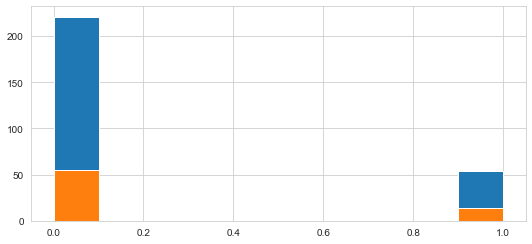

In [35]:
#compare the distribution of target variable in train and test set
plt.hist(Y_train, label = "Y train")
plt.hist(Y_test, label = "Y test")

(array([23.,  0.,  0.,  0.,  0., 35.,  0.,  0.,  0., 11.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

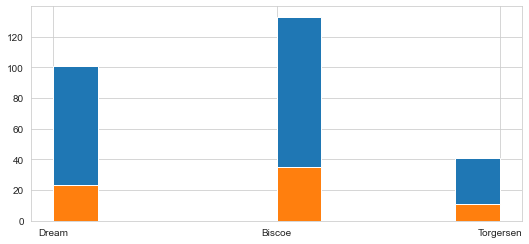

In [36]:
#compare the distribution of island feature in train and test set
plt.hist(X_train['island'])
plt.hist(X_test['island'])

(array([ 6., 14.,  6.,  8.,  7.,  9., 16.,  1.,  0.,  2.]),
 array([34.1 , 36.49, 38.88, 41.27, 43.66, 46.05, 48.44, 50.83, 53.22,
        55.61, 58.  ]),
 <a list of 10 Patch objects>)

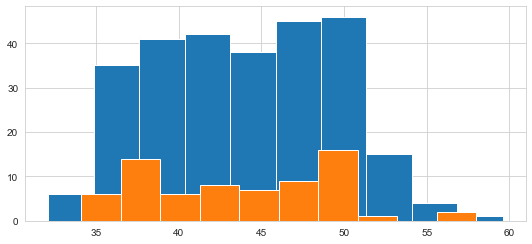

In [37]:
#compare the distribution of culmen length feature in train and test set
plt.hist(X_train['culmen_length_mm'])
plt.hist(X_test['culmen_length_mm'])

(array([ 4.,  6.,  6.,  8.,  5.,  9., 16.,  7.,  4.,  4.]),
 array([13.4 , 14.18, 14.96, 15.74, 16.52, 17.3 , 18.08, 18.86, 19.64,
        20.42, 21.2 ]),
 <a list of 10 Patch objects>)

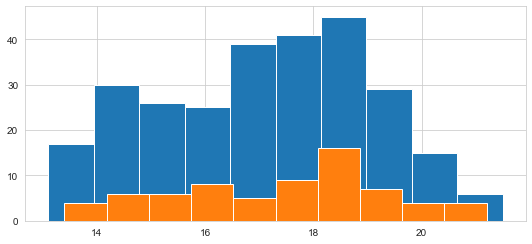

In [38]:
#compare the distribution of culmen depth feature in train and test set
plt.hist(X_train['culmen_depth_mm'])
plt.hist(X_test['culmen_depth_mm'])

(array([ 1.,  4., 12.,  9., 12.,  3.,  9.,  8.,  6.,  5.]),
 array([174. , 179.5, 185. , 190.5, 196. , 201.5, 207. , 212.5, 218. ,
        223.5, 229. ]),
 <a list of 10 Patch objects>)

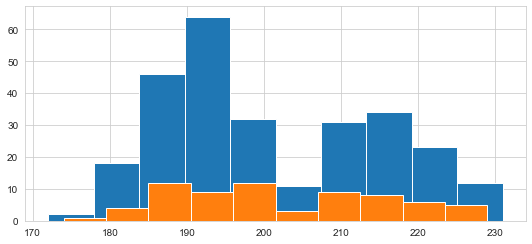

In [39]:
#compare the distribution of flipper length feature in train and test set
plt.hist(X_train['flipper_length_mm'])
plt.hist(X_test['flipper_length_mm'])

(array([ 3., 13., 10., 15.,  7.,  5.,  6.,  6.,  3.,  1.]),
 array([2850., 3195., 3540., 3885., 4230., 4575., 4920., 5265., 5610.,
        5955., 6300.]),
 <a list of 10 Patch objects>)

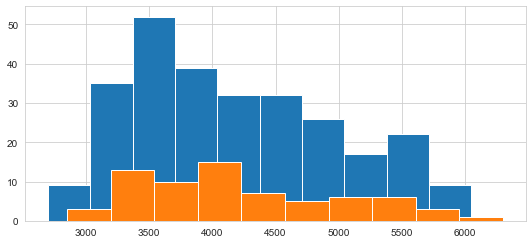

In [40]:
#compare the distribution of body mass feature in train and test set
plt.hist(X_train['body_mass_g'])
plt.hist(X_test['body_mass_g'])

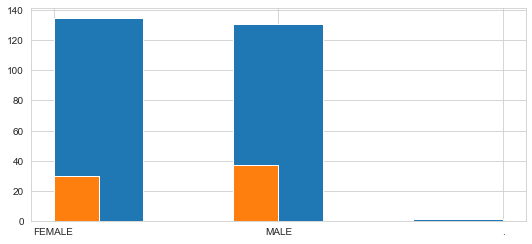

In [41]:
#compare the distribution of sex feature in train and test set
X_train['sex'].hist(bins=5)
X_test['sex'].hist(bins=5)

### C) Baseline and Heuristic Models [4 points]

Before diving into ML, it's useful to first come up with a simple benchmark model, whose performance you will then try to beat. A simple rules-based (or "heuristic") model approach, based on learnings from EDA, is often a good place to start. It helps you build an intuition around the problem you are trying to solve. 






i) Without even using machine learning, come up with a simple rules-based model using 1-3 features to predict the target label. Evaluate the accuracy of this approach on your test dataset. How does this compare to random 50:50 guessing of the target label? How does this compare with a classifier that predicts 0 (non-Chinstrap) every time? [3 points]

In [42]:
# rule-based model
def chinstrap(length, depth):
    if (length >= 44) or (depth >= 17):
        return 1
    else:
        return 0

In [43]:
# based on the rule-based model to predict if the penguin is chinstrap or not
is_chinstrap_base = []

for i in range(0, X_test.shape[0]):
    length = X_test['culmen_length_mm'].values[i]
    depth = X_test['culmen_depth_mm'].values[i]
    is_chinstrap_y = chinstrap(length, depth)
    is_chinstrap_base.append(is_chinstrap_y)

In [44]:
from sklearn.metrics import confusion_matrix

cm_base = confusion_matrix(Y_test, is_chinstrap_base)
df = pd.DataFrame(cm_base, index=['neg', 'pos'], columns=['neg','pos'])
df['total'] = df.sum(axis=1)
df

,neg,pos,total
neg,4,51,55
pos,1,13,14


In [45]:
TN_base = cm_base[0,0]
TP_base = cm_base[1,1]
FP_base = cm_base[0,1]
FN_base = cm_base[1,0]
Accuracy_base = (TP_base + TN_base) /(TP_base + FP_base + TN_base + FN_base)
print ("Accuracy:", Accuracy_base)

Accuracy: 0.2463768115942029


In [46]:
is_chinstrap_50 = np.random.choice([0, 1], size=(X_test.shape[0]), p=[1/2, 1/2])
cm_50 = confusion_matrix(Y_test, is_chinstrap_50)
df = pd.DataFrame(cm_50, index=['neg', 'pos'], columns=['neg','pos'])
df['total'] = df.sum(axis=1)
df

,neg,pos,total
neg,30,25,55
pos,9,5,14


In [47]:
TN_50 = cm_50[0,0]
TP_50 = cm_50[1,1]
FP_50 = cm_50[0,1]
FN_50 = cm_50[1,0]
Accuracy_50 = (TP_50 + TN_50) /(TP_50 + FP_50 + TN_50 + FN_50)
print ("Accuracy:", Accuracy_50)

Accuracy: 0.5072463768115942


In [48]:
nonchinstrap = [0]* X_test.shape[0]

cm_non = confusion_matrix(Y_test, nonchinstrap)
df = pd.DataFrame(cm_non, index=['neg', 'pos'], columns=['neg','pos'])
df['total'] = df.sum(axis=1)
df

,neg,pos,total
neg,55,0,55
pos,14,0,14


In [49]:
TN_non = cm_non[0,0]
TP_non = cm_non[1,1]
FP_non = cm_non[0,1]
FN_non = cm_non[1,0]
Accuracy_non = (TP_non + TN_non) /(TP_non + FP_non + TN_non + FN_non)
print ("Accuracy:", Accuracy_non)

Accuracy: 0.7971014492753623


The Accuracy of my rules-based model is 24.64%, which is lower than both random 50:50 and a classifier that predicts 0 everytime. The Accuracy of random 50:50 and predicts 0 everytime are 50.72% and 79.71% respectively.

ii) What if it was more important that we succesfully identify all Chinstrap penguins and not miss any, even if this means we sometimes have False Positives? Name two scoring metrics that might do a better job in this context than accuracy. Then calculate the F1 score of your model instead of its accuracy. How do the F1 scores compare between your model, the 50:50 guessing model, and the "always non-Chinstrap" model considered in (i) above?

Precision and Recall might be better scroing metrices than accuracy in this case.

In [50]:
F1_base = TP_base /(TP_base + ((FN_base + FP_base)/2))
F1_base

0.3333333333333333

In [51]:
F1_50 = TP_50 /(TP_50 + ((FN_50 + FP_50)/2))
F1_50

0.22727272727272727

In [52]:
F1_non = TP_non /(TP_non + ((FN_non + FP_non)/2))
F1_non

0.0

The F1 score of my rules-based model is 0.3333, which is better than both random 50:50 and a classifier that predicts 0 everytime. The F1 score of random 50:50 and predicts 0 everytime are 0.2272 and 0.0 respectively.

### D) Prepare the Data Inputs for Machine Learning [6 points]

Your heuristic model can be taken as your 'benchmark' model, or "latest best". You will now try to beat its performance using ML techniques. 

First, build data preprocessing pipeline that transforms your train and test datasets into a form suitable for ML training and inference. You can write your own functions, or leverage the scikit-learn pipelines we demonstrated in class. The choice is yours. 

Ensure your data preprocessing pipeline accounts for the following:
* input features are on the correct scale
* categorical features can be processed by the model
* missing or erroneous values are handled


**NOTE**: if using scikit-learn's ColumnTransformer, please be sure to separate your target labels from your features prior to applying the ColumnTransformer, because ColumnTransformer drops the column names and may return them in an unexpected order. 


In [53]:
# split the dataset into numeric and categorical subsets
numeric_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']
categorical_features = ['island', 'sex']

In [54]:
# replace missing value with medain for numeric features and most frequent for categorical features
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())])

In [55]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

In [56]:
preprocessor = ColumnTransformer(transformers = [
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [57]:
clf = Pipeline(steps=[('preprocessor', preprocessor)])
X_train_clean = clf.fit_transform(X_train)
X_test_clean = clf.fit_transform(X_test)

### E) Train and Compare ML Classifiers [3 points]

**Without modifying any of the provided hyperparameters**, train the following three classifiers using F1 score and Cross-Validation (CV). 

> Note: you **do not** need to optimize any of these models to receive full marks for this assignment. We won't judge model optimization until later assignments, except for the Bonus question at the end. 


In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# use these classifiers, without changing their settings
perceptron_clf = SGDClassifier(max_iter=100, loss='perceptron', random_state=42)
tree_clf = DecisionTreeClassifier(max_features=2, max_depth=2, random_state=42)
ada_clf = AdaBoostClassifier(random_state=42)


In [59]:
perceptron_clf.fit(X_train_clean, Y_train)

SGDClassifier(loss='perceptron', max_iter=100, random_state=42)

In [60]:
#calculate cross-validation score of SDC Classifier 
from sklearn.model_selection import cross_val_score
perceptron_score = cross_val_score(perceptron_clf, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
perceptron_score

[CV] END ................................ score: (test=0.989) total time=   0.0s
[CV] END ................................ score: (test=0.989) total time=   0.0s
[CV] END ................................ score: (test=0.989) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.98913043, 0.98913043, 0.98901099])

In [61]:
#calculate F1 score of SDC Classifier 
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

Y_train_pred_perceptron = cross_val_predict(perceptron_clf, X_train_clean, Y_train, cv=3, verbose=5)
f1_score(Y_train, Y_train_pred_perceptron, average='binary')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.9719626168224299

In [62]:
tree_clf.fit(X_train_clean, Y_train)

DecisionTreeClassifier(max_depth=2, max_features=2, random_state=42)

In [63]:
#calculate cross-validation score of Decision Tree Classifier 
tree_score = cross_val_score(tree_clf, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score

[CV] END ................................ score: (test=0.793) total time=   0.0s
[CV] END ................................ score: (test=0.804) total time=   0.0s
[CV] END ................................ score: (test=0.802) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.79347826, 0.80434783, 0.8021978 ])

In [64]:
#calculate F1 score of Decision Tree Classifier
Y_train_pred_tree = cross_val_predict(tree_clf, X_train_clean, Y_train, cv=3, verbose=5)
f1_score(Y_train, Y_train_pred_tree, average='binary')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


0.17910447761194032

In [65]:
ada_clf.fit(X_train_clean, Y_train)

AdaBoostClassifier(random_state=42)

In [66]:
#calculate cross-validation score of AdaBoost Classifier 
ada_score = cross_val_score(ada_clf, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
ada_score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] END ................................ score: (test=0.989) total time=   0.1s
[CV] END ................................ score: (test=0.989) total time=   0.1s
[CV] END ................................ score: (test=0.989) total time=   0.1s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


array([0.98913043, 0.98913043, 0.98901099])

In [67]:
#calculate F1 score of AdaBoost Classifier
Y_train_pred_ada = cross_val_predict(ada_clf, X_train_clean, Y_train, cv=3, verbose=5)
f1_score(Y_train, Y_train_pred_ada, average='binary')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


0.9724770642201834

i) Compare their CV scores side-by-side in a plot, showing the mean score plus error bars representing the standard deviation. Which model performs the best? Does it perform better than your original heuristic model? [2 points]

> NOTE: if a model does not converge or gives only NaNs as output, try changing `random_state` and see if that makes a difference. 


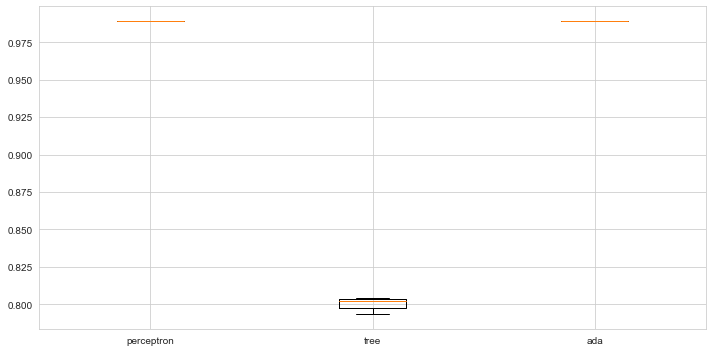

In [68]:
model_scores = [
    ('perceptron', perceptron_score),
    ('tree', tree_score),
    ('ada', ada_score),
]

# Plot scores
plt.figure(figsize=(10,5))
plt.boxplot([mod[1] for mod in model_scores],
            labels=[mod[0] for mod in model_scores])
plt.show()

From the box plot above, we can tell that the model with AdaBoost Classifier performs better than others. The F1 score of it is 0.9725, which is much better than my original heuristic model.

ii) Now take the DecisionTree classifier and plot its CV score for a few different values of `max_features` and `max_depth`. Do you notice any impact on performance? State any reasons you can think of that migth explain the changes (or lack thereof) that you see. [1 point]

In [69]:
tree_clf_max21 = DecisionTreeClassifier(max_features=2, max_depth=1, random_state=42)
tree_score_21 = cross_val_score(tree_clf_max21, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score_21

[CV] END ................................ score: (test=0.804) total time=   0.0s
[CV] END ................................ score: (test=0.804) total time=   0.0s
[CV] END ................................ score: (test=0.802) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.80434783, 0.80434783, 0.8021978 ])

In [70]:
tree_clf_max31 = DecisionTreeClassifier(max_features=3, max_depth=1, random_state=42)
tree_score_31 = cross_val_score(tree_clf_max31, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score_31

[CV] END ................................ score: (test=0.804) total time=   0.0s
[CV] END ................................ score: (test=0.804) total time=   0.0s
[CV] END ................................ score: (test=0.802) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.80434783, 0.80434783, 0.8021978 ])

In [71]:
tree_clf_max41 = DecisionTreeClassifier(max_features=4, max_depth=1, random_state=42)
tree_score_41 = cross_val_score(tree_clf_max41, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score_41

[CV] END ................................ score: (test=0.804) total time=   0.0s
[CV] END ................................ score: (test=0.804) total time=   0.0s
[CV] END ................................ score: (test=0.802) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.80434783, 0.80434783, 0.8021978 ])

In [72]:
tree_clf_max12 = DecisionTreeClassifier(max_features=1, max_depth=2, random_state=42)
tree_score_12 = cross_val_score(tree_clf_max12, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score_12

[CV] END ................................ score: (test=0.815) total time=   0.0s
[CV] END ................................ score: (test=0.837) total time=   0.0s
[CV] END ................................ score: (test=0.802) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.81521739, 0.83695652, 0.8021978 ])

In [73]:
tree_clf_max13 = DecisionTreeClassifier(max_features=1, max_depth=3, random_state=42)
tree_score_13 = cross_val_score(tree_clf_max13, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score_13

[CV] END ................................ score: (test=0.772) total time=   0.0s
[CV] END ................................ score: (test=0.826) total time=   0.0s
[CV] END ................................ score: (test=0.835) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.77173913, 0.82608696, 0.83516484])

In [74]:
tree_clf_max14 = DecisionTreeClassifier(max_features=1, max_depth=4, random_state=42)
tree_score_14 = cross_val_score(tree_clf_max14, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score_14

[CV] END ................................ score: (test=0.772) total time=   0.0s
[CV] END ................................ score: (test=0.826) total time=   0.0s
[CV] END ................................ score: (test=0.846) total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.77173913, 0.82608696, 0.84615385])

In [75]:
tree_clf_max15 = DecisionTreeClassifier(max_features=1, max_depth=5, random_state=42)
tree_score_15 = cross_val_score(tree_clf_max15, X_train_clean, Y_train, cv=3, scoring="accuracy", verbose=5)
tree_score_15

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END ................................ score: (test=0.848) total time=   0.0s
[CV] END ................................ score: (test=0.935) total time=   0.0s
[CV] END ................................ score: (test=0.846) total time=   0.0s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


array([0.84782609, 0.93478261, 0.84615385])

Comparing the score of modle with different values of max_feature, found that it has no impact on the performance. On the other hand, we can tell that the model with max_depth 5 has better performance than the one with max_depth 2. The performance of model is not always better when the value of max_depth is bigger, because the model may be overfiiting when the number is too big.  

### F) Examine Misclassifications [2 points]

Plot a confusion matrix for your choice of best model and answer the following: 
* What are the True Positive and True Negative rates of your model? What is your model's Precision? What is its Recall?
* If you wanted to ensure that you did not 'miss' any Chinstraps (i.e. all actual Chinstraps are correctly identified), should you optimize for Precision or Recall?

 

> Note: We'll end the assignment here, but a natural next-step would be to examine the samples that were misclassified searching for trends that explain why (e.g. are these samples near the threshold of a decision boundary? etc). 

In [76]:
#select adaboost as the model and compute confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_train, Y_train_pred_ada)
df = pd.DataFrame(cm, index=['neg', 'pos'], columns=['neg','pos'])
df['total'] = df.sum(axis=1)
df

,neg,pos,total
neg,219,2,221
pos,1,53,54


In [77]:
# calculate the True Positive and True Negative rates of model
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
True_positive_rate = TP/(TP + FN)
print ("True positive rate:", True_positive_rate)
True_negative_rate = TN/(TN + FP)
print ("True negative rate:", True_negative_rate)

True positive rate: 0.9814814814814815
True negative rate: 0.9909502262443439


In [78]:
#calculate the Precision and Recall of model
prec = TP / (TP + FP)
rec = TP / (TP + FN)
print("Precision:", prec)
print("Recall:", rec)

Precision: 0.9636363636363636
Recall: 0.9814814814814815


If we want to ensure that we did not 'miss' any Chinstraps, we should optimize for Recall.

# Part 2) Multilabel Classification [BONUS - 2 points]
***

> NOTE : This section is entirely optional. Attempt it if you'd like extra practice. Marks scored here will count towards the total for this assignment and can compensate for any points lost in Part 1. The final value of the assignment will is capped at 100%. 

Now your goal is to successfully classify each sample into one of the following species: Chinstrap, Adélie, or Gentoo.

Show and explain the steps you take. Use any ML classification method of choice. Feel free to experiment with hyperparemeter tuning (e.g. grid search) or any other technique you think might lead to a better model. 

We have re-loaded the original dataset for you below, and the target variable will now be `species`. 


In [79]:
df_penguin_data = pd.read_csv("./2022-a1-penguin-classification.csv")
df_penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [80]:
df_penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [81]:
# create a new column to number different categories of species
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_penguin_data["species_cat"] = ord_enc.fit_transform(df_penguin_data[["species"]])

In [82]:
#split the test and traing dataset
X_m = df_penguin_data.drop(['species','species_cat'],axis=1)
Y_m = df_penguin_data['species_cat']

X_train_m, X_test_m, Y_train_m, Y_test_m = train_test_split(X_m, Y_m, test_size=0.2, random_state=42)
print(X_train_m.shape)
print(X_test_m.shape)
print(Y_train_m.shape)
print(Y_test_m.shape)

(275, 6)
(69, 6)
(275,)
(69,)


In [83]:
# replace missing value with medain for numeric features and most frequent for categorical features
num_features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']
cat_features = ['island', 'sex']

num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor_m = ColumnTransformer(transformers = [
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

clf_m = Pipeline(steps=[('preprocessor', preprocessor_m)])
X_train_m_clean = clf_m.fit_transform(X_train_m)
X_test_m_clean = clf_m.fit_transform(X_test_m)

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
#create multilabel target variable
Y_train_Adelie = (Y_train_m == 0)
Y_train_Chinstrap = (Y_train_m == 1)
Y_train_Gentoo = (Y_train_m == 2)
Y_multilabel = np.c_[Y_train_Adelie, Y_train_Chinstrap, Y_train_Gentoo]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_m_clean, Y_multilabel)

KNeighborsClassifier()

In [86]:
%%time
Y_train_knn_pred = cross_val_predict(knn_clf, X_train_m_clean, Y_multilabel, cv=3, n_jobs=-1)

CPU times: user 57.9 ms, sys: 104 ms, total: 162 ms
Wall time: 1.29 s


In [87]:
#calculate F1 score with "macro" average method 
f1_score(Y_multilabel, Y_train_knn_pred, average="macro")

0.9969908578753838

In [88]:
#calculate F1 score with "weighted" average method 
f1_score(Y_multilabel, Y_train_knn_pred, average="weighted")

0.9963623115069327

In [89]:
# Custom function to time model training
import time
from time import time as now

def t_start():
    global t0
    t0 = now()

def t_end():
    global t0
    t_delt = (now() - t0)
    print("Training time: {:.3f} seconds".format(t_delt))

t_start()
time.sleep(2)
t_end()

Training time: 2.003 seconds


In [90]:
from sklearn.model_selection import GridSearchCV
import joblib 
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {   'n_estimators': np.arange(5,100,5), 
        'max_features': np.arange(1,10,1)
    },
  ]    

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                           scoring='neg_mean_squared_error', 
                           return_train_score=True, 
                           verbose=2
                          )

t_start()
grid_search.fit(X_train_m_clean, Y_multilabel)
t_end()

# Save Model
joblib.dump(grid_search, "rf_gscv.pkl") 

grid_search

Fitting 3 folds for each of 171 candidates, totalling 513 fits
[CV] END .....................max_features=1, n_estimators=5; total time=   0.0s
[CV] END .....................max_features=1, n_estimators=5; total time=   0.0s
[CV] END .....................max_features=1, n_estimators=5; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=10; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=15; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=20; total time=   0.0s
[CV] END ....................max_features=1, n_estimators=20; total time=   0.0s
[CV] END ....................max_features=1, n

[CV] END ....................max_features=2, n_estimators=80; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=80; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=80; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=85; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=85; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=85; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=90; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=90; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=90; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=95; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=95; total time=   0.1s
[CV] END ....................max_features=2, n_estimators=95; total time=   0.2s
[CV] END ...................

[CV] END ....................max_features=4, n_estimators=60; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=60; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=65; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=65; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=65; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=70; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=70; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=70; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=75; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=75; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=75; total time=   0.1s
[CV] END ....................max_features=4, n_estimators=80; total time=   0.1s
[CV] END ...................

[CV] END ....................max_features=6, n_estimators=45; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=45; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=45; total time=   0.0s
[CV] END ....................max_features=6, n_estimators=50; total time=   0.0s
[CV] END ....................max_features=6, n_estimators=50; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=50; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=55; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=55; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=55; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=60; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=60; total time=   0.1s
[CV] END ....................max_features=6, n_estimators=60; total time=   0.1s
[CV] END ...................

[CV] END ....................max_features=8, n_estimators=30; total time=   0.0s
[CV] END ....................max_features=8, n_estimators=30; total time=   0.0s
[CV] END ....................max_features=8, n_estimators=35; total time=   0.0s
[CV] END ....................max_features=8, n_estimators=35; total time=   0.0s
[CV] END ....................max_features=8, n_estimators=35; total time=   0.0s
[CV] END ....................max_features=8, n_estimators=40; total time=   0.1s
[CV] END ....................max_features=8, n_estimators=40; total time=   0.0s
[CV] END ....................max_features=8, n_estimators=40; total time=   0.0s
[CV] END ....................max_features=8, n_estimators=45; total time=   0.1s
[CV] END ....................max_features=8, n_estimators=45; total time=   0.1s
[CV] END ....................max_features=8, n_estimators=45; total time=   0.1s
[CV] END ....................max_features=8, n_estimators=50; total time=   0.1s
[CV] END ...................

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [91]:
grid_search.best_params_

{'max_features': 1, 'n_estimators': 95}

In [92]:
# Best estimator is retrained on entire training set
grid_search.best_estimator_

RandomForestRegressor(max_features=1, n_estimators=95, random_state=42)

In [93]:
# Extract score and params
cvres = grid_search.cv_results_
scores = np.sqrt(-cvres["mean_test_score"])
max_features = []
n_estimators = []
for i in cvres["params"]:
    max_features.append(i['max_features'])
    n_estimators.append(i['n_estimators'])

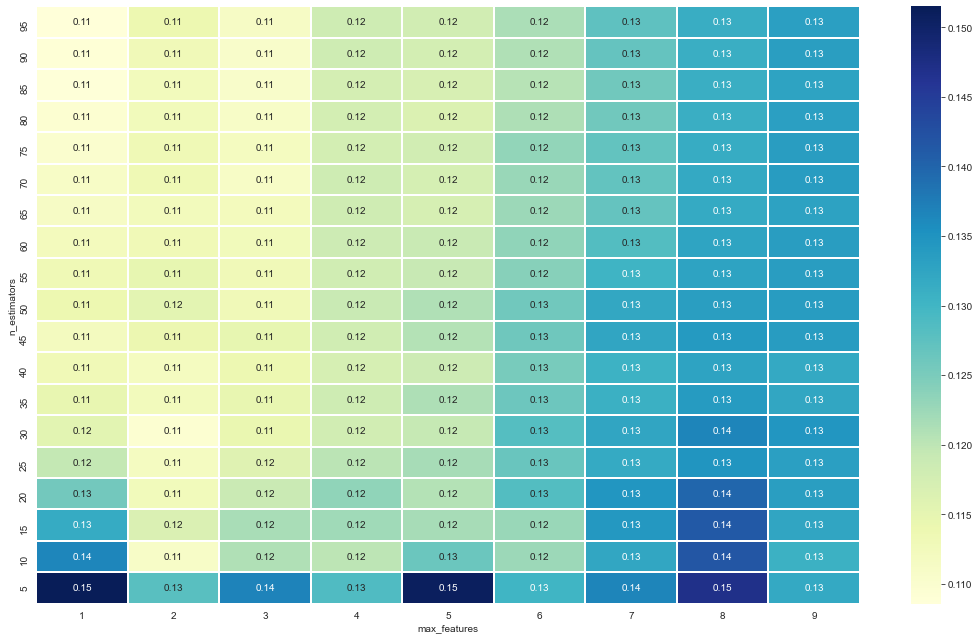

In [94]:
df = pd.DataFrame({"max_features":max_features, "n_estimators":n_estimators, "scores":scores})
df_pivot = df.pivot(columns='max_features', index='n_estimators', values='scores')

# Plot hyperparam heatmap
plt.figure(figsize=(15,9))
sns.heatmap(df_pivot, cmap="YlGnBu", annot=True, linewidths=1, linecolor='white')
plt.gca().invert_yaxis()
plt.show() 